In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 

word_freq = pd.read_csv("data/_unigram_freq.csv")
word_freq

,word,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
4,a,9081174698
...,...,...
333328,gooek,12711
333329,gooddg,12711
333330,gooblle,12711
333331,gollgo,12711


In [4]:
import pandas as pd
import numpy as np

time_series = pd.read_csv("data/_time_series.csv", index_col=0, parse_dates=True)
print(time_series)
# time_series[time_series.columns[-72:]].plot()

                line     using      more     about      name     media  \
1800-01-01  0.000180  0.000021  0.001674  0.000688  0.000386  0.000001   
1801-01-01  0.000159  0.000023  0.001719  0.000650  0.000381  0.000002   
1802-01-01  0.000201  0.000019  0.001637  0.000592  0.000375  0.000001   
1803-01-01  0.000163  0.000021  0.001559  0.000556  0.000323  0.000001   
1804-01-01  0.000141  0.000018  0.001697  0.000564  0.000413  0.000001   
...              ...       ...       ...       ...       ...       ...   
2015-01-01  0.000197  0.000257  0.001529  0.001459  0.000240  0.000090   
2016-01-01  0.000197  0.000272  0.001534  0.001414  0.000227  0.000102   
2017-01-01  0.000185  0.000248  0.001497  0.001405  0.000244  0.000089   
2018-01-01  0.000176  0.000247  0.001469  0.001352  0.000242  0.000083   
2019-01-01  0.000179  0.000266  0.001498  0.001407  0.000235  0.000091   

             through    estate  provided       way  ...      make  \
1800-01-01  0.000482  0.000087  0.000088  

In [5]:
min_index = time_series.diff().sum().argmin()
max_index = time_series.diff().sum().argmax()
print()

time_series.diff().sum()

line      -0.000002
using      0.000246
more      -0.000176
about      0.000719
name      -0.000151
             ...   
another   -0.000047
time       0.000039
west      -0.000028
size       0.000046
gallery   -0.000003
Length: 512, dtype: float64

<Axes: >

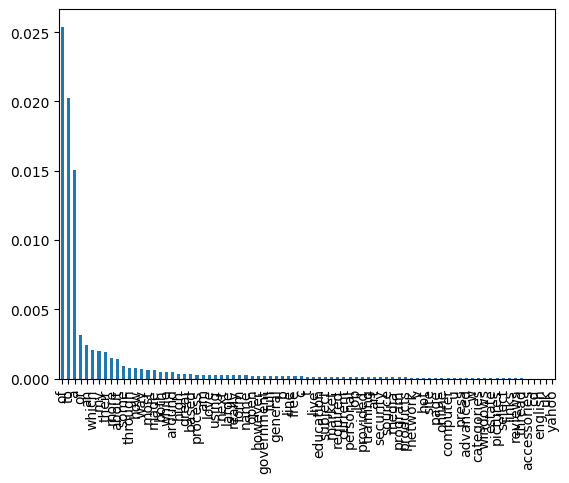

In [6]:
time_series.iloc[-1, :81].sort_values(ascending=False).plot(kind='bar')

In [7]:
import numpy as np
import gensim.downloader as api

model = api.load("glove-wiki-gigaword-50")

In [8]:
model['word']

array([-0.1643   ,  0.15722  , -0.55021  , -0.3303   ,  0.66463  ,
       -0.1152   , -0.2261   , -0.23674  , -0.86119  ,  0.24319  ,
        0.074499 ,  0.61081  ,  0.73683  , -0.35224  ,  0.61346  ,
        0.0050975, -0.62538  , -0.0050458,  0.18392  , -0.12214  ,
       -0.65973  , -0.30673  ,  0.35038  ,  0.75805  ,  1.0183   ,
       -1.7424   , -1.4277   ,  0.38032  ,  0.37713  , -0.74941  ,
        2.9401   , -0.8097   , -0.66901  ,  0.23123  , -0.073194 ,
       -0.13624  ,  0.24424  , -1.0129   , -0.24919  , -0.06893  ,
        0.70231  , -0.022177 , -0.64684  ,  0.59599  ,  0.027092 ,
        0.11203  ,  0.61214  ,  0.74339  ,  0.23572  , -0.1369   ],
      dtype=float32)

In [9]:
wordvec_dict = {}
for word in time_series.columns:
    wordvec_dict[word] = model[word]

wordvec_df = pd.DataFrame.from_dict(wordvec_dict, orient='columns')
wordvec_df.corr()

,line,using,more,about,name,media,through,estate,provided,way,...,make,download,title,sales,note,another,time,west,size,gallery
line,1.000000,0.685633,0.586744,0.552203,0.597412,0.495833,0.789645,0.397281,0.620507,0.735962,...,0.648773,0.380922,0.438235,0.514283,0.501727,0.670504,0.691311,0.690774,0.518428,0.314213
using,0.685633,1.000000,0.707059,0.589630,0.610697,0.621212,0.735234,0.291061,0.749788,0.690126,...,0.741776,0.552003,0.359124,0.471068,0.500968,0.654058,0.641001,0.379114,0.589846,0.248699
more,0.586744,0.707059,1.000000,0.880638,0.528816,0.632527,0.728396,0.446835,0.730368,0.821739,...,0.869503,0.321410,0.398772,0.624100,0.564388,0.767995,0.786106,0.543004,0.677380,0.254026
about,0.552203,0.589630,0.880638,1.000000,0.541513,0.634294,0.710910,0.436328,0.619546,0.765350,...,0.745181,0.269879,0.358393,0.523892,0.617512,0.766198,0.797534,0.524440,0.579758,0.252663
name,0.597412,0.610697,0.528816,0.541513,1.000000,0.526236,0.507339,0.476254,0.607462,0.619003,...,0.606415,0.381816,0.623331,0.363255,0.597291,0.709985,0.628982,0.485533,0.489578,0.307278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
another,0.670504,0.654058,0.767995,0.766198,0.709985,0.602741,0.721529,0.445904,0.694513,0.800930,...,0.777744,0.311190,0.630064,0.507767,0.602924,1.000000,0.848703,0.621302,0.611254,0.279312
time,0.691311,0.641001,0.786106,0.797534,0.628982,0.600708,0.810780,0.412507,0.665569,0.858265,...,0.818114,0.416552,0.701906,0.537445,0.602289,0.848703,1.000000,0.585068,0.582682,0.327928
west,0.690774,0.379114,0.543004,0.524440,0.485533,0.416949,0.671078,0.420242,0.531309,0.627308,...,0.512558,0.156062,0.369768,0.276398,0.342874,0.621302,0.585068,1.000000,0.287170,0.371838
size,0.518428,0.589846,0.677380,0.579758,0.489578,0.304095,0.482561,0.411892,0.540753,0.537118,...,0.600380,0.208619,0.408917,0.553038,0.515551,0.611254,0.582682,0.287170,1.000000,0.238789


In [10]:
time_series.corr()


,line,using,more,about,name,media,through,estate,provided,way,...,make,download,title,sales,note,another,time,west,size,gallery
line,1.000000,0.002281,-0.815767,0.241769,-0.502325,-0.148556,0.286232,0.256482,0.728936,0.070574,...,-0.210134,-0.212068,0.451886,0.407512,0.786626,-0.629138,-0.109475,0.443851,0.469709,-0.464384
using,0.002281,1.000000,-0.417917,0.789654,-0.749534,0.960056,0.756151,-0.836829,0.515408,0.383122,...,-0.627790,0.718533,-0.558289,0.615320,-0.119467,-0.528670,-0.697379,-0.811233,0.764296,-0.604605
more,-0.815767,-0.417917,1.000000,-0.393671,0.826358,-0.216212,-0.403352,0.139407,-0.944185,0.047954,...,0.607734,0.071187,-0.264077,-0.746712,-0.566332,0.919783,0.547025,0.005449,-0.801419,0.770432
about,0.241769,0.789654,-0.393671,1.000000,-0.638109,0.830389,0.966496,-0.635513,0.432693,0.785702,...,-0.248503,0.797474,-0.555080,0.461412,0.101767,-0.332846,-0.257288,-0.522596,0.608374,-0.477034
name,-0.502325,-0.749534,0.826358,-0.638109,1.000000,-0.589181,-0.627085,0.622386,-0.912265,-0.074754,...,0.717656,-0.240093,0.205911,-0.919387,-0.149332,0.909038,0.735913,0.471542,-0.964298,0.925208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
another,-0.629138,-0.528670,0.919783,-0.332846,0.909038,-0.303109,-0.347457,0.364560,-0.960836,0.235587,...,0.779649,0.086399,-0.123543,-0.884669,-0.304578,1.000000,0.758229,0.217062,-0.906571,0.881735
time,-0.109475,-0.697379,0.547025,-0.257288,0.735913,-0.530431,-0.254887,0.572232,-0.651387,0.284032,...,0.895862,-0.089547,0.139421,-0.714839,0.055903,0.758229,1.000000,0.519375,-0.794952,0.661242
west,0.443851,-0.811233,0.005449,-0.522596,0.471542,-0.832889,-0.473509,0.894036,-0.150979,-0.218093,...,0.393017,-0.624352,0.727748,-0.430164,0.553451,0.217062,0.519375,1.000000,-0.452874,0.418761
size,0.469709,0.764296,-0.801419,0.608374,-0.964298,0.589305,0.611129,-0.615380,0.894625,0.027961,...,-0.813256,0.230165,-0.167946,0.912163,0.158543,-0.906571,-0.794952,-0.452874,1.000000,-0.874496


<Axes: >

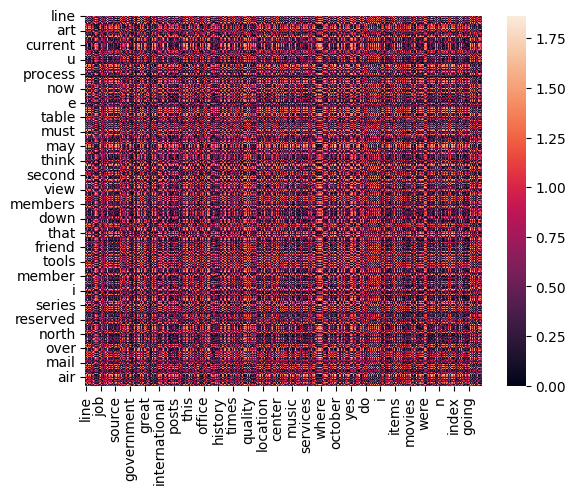

In [11]:
diff_dot_time = (time_series.corr() - wordvec_df.corr()).abs()
sns.heatmap(diff_dot_time)
# print(np.argmax(diff_dot_time))

# idx_2d = np.unravel_index(np.argmax(diff_dot_time), diff_dot_time.shape)
# print(idx_2d)
# print(diff_dot_time.columns[idx_2d[0]], diff_dot_time.columns[idx_2d[1]])

In [1]:
from gensim.models import Word2Vec

model = Word2Vec.load("glove-wiki-gigaword-50")

# 'word' とコサイン類似度（正規化された内積）が高い順に10個取得
result = model.wv.most_similar('ある単語', topn=10)

for word, score in result:
    print(f"{word}: {score}")

FileNotFoundError: [Errno 2] No such file or directory: 'glove-wiki-gigaword-50'